In [62]:
%pip install pandas
%pip install numpy
%pip install matplotlib

# Import require installed library using the given command. 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [25, 8]   # set inline plots, width and height in inches
plt.style.use('ggplot')



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
# Loading csv files
tr=pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/to_read.csv').dropna()
r=pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/ratings.csv').dropna()
t=pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/tags.csv').dropna()
b=pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/books.csv').dropna()
bt=pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/book_tags.csv').dropna()



print(tr.head())
print(r.head())
print(t.head())
print(b.head())
print(bt.head())

   user_id  book_id
0        9        8
1       15      398
2       15      275
3       37     7173
4       34      380
   user_id  book_id  rating
0        1      258       5
1        2     4081       4
2        2      260       5
3        2     9296       5
4        2     2318       3
   tag_id tag_name
0       0        -
1       1     --1-
2       2    --10-
3       3    --12-
4       4   --122-
   book_id  goodreads_book_id  best_book_id  work_id  books_count       isbn  \
0        1            2767052       2767052  2792775          272  439023483   
1        2                  3             3  4640799          491  439554934   
2        3              41865         41865  3212258          226  316015849   
3        4               2657          2657  3275794          487   61120081   
4        5               4671          4671   245494         1356  743273567   

         isbn13                      authors  original_publication_year  \
0  9.780439e+12              Suzanne Colli

 **# Overview of Dataset**

In [64]:
#Total no. of Books
print('The total no. of books in dataset are {}.'.format(len(b['book_id'])))

#Total no. users
print('The total no. of users are {}'.format(len(r['user_id'].drop_duplicates())))

#Total no. of ratings
print('The total no. of rating counts of whole dataset by users is {}'.format(b['ratings_count'].sum()))

#No. of users that rated any book atleast once
print('The no. of users that rated any book atleast once {}'.format(len(r['user_id'].drop_duplicates())))

#Total no. of distinct languages
print('No. of distinct language books available in dataset are {}'.format(len(b['language_code'].value_counts().index)))
print('The languages are {}'.format(b['language_code'].value_counts().index.tolist()))

#Total no. of authors
print('The total no. of different authors are {}'.format(len(b['language_code'].value_counts().index)))

#Total no. of to-read books
print('The total no. of to-read books suggested by users are {}'.format(len(tr['book_id'].drop_duplicates())))

The total no. of books in dataset are 7860.
The total no. of users are 53424
The total no. of rating counts of whole dataset by users is 480834168
The no. of users that rated any book atleast once 53424
No. of distinct language books available in dataset are 23
The languages are ['eng', 'en-US', 'en-GB', 'en-CA', 'fre', 'spa', 'ger', 'ind', 'ara', 'jpn', 'por', 'pol', 'dan', 'ita', 'per', 'nor', 'vie', 'nl', 'tur', 'fil', 'swe', 'rum', 'rus']
The total no. of different authors are 23
The total no. of to-read books suggested by users are 9986


A. Can we find the probability of different ratings from 1 to 5 for a newly launched book, given that the book is rated by same set of users in the given dataset?


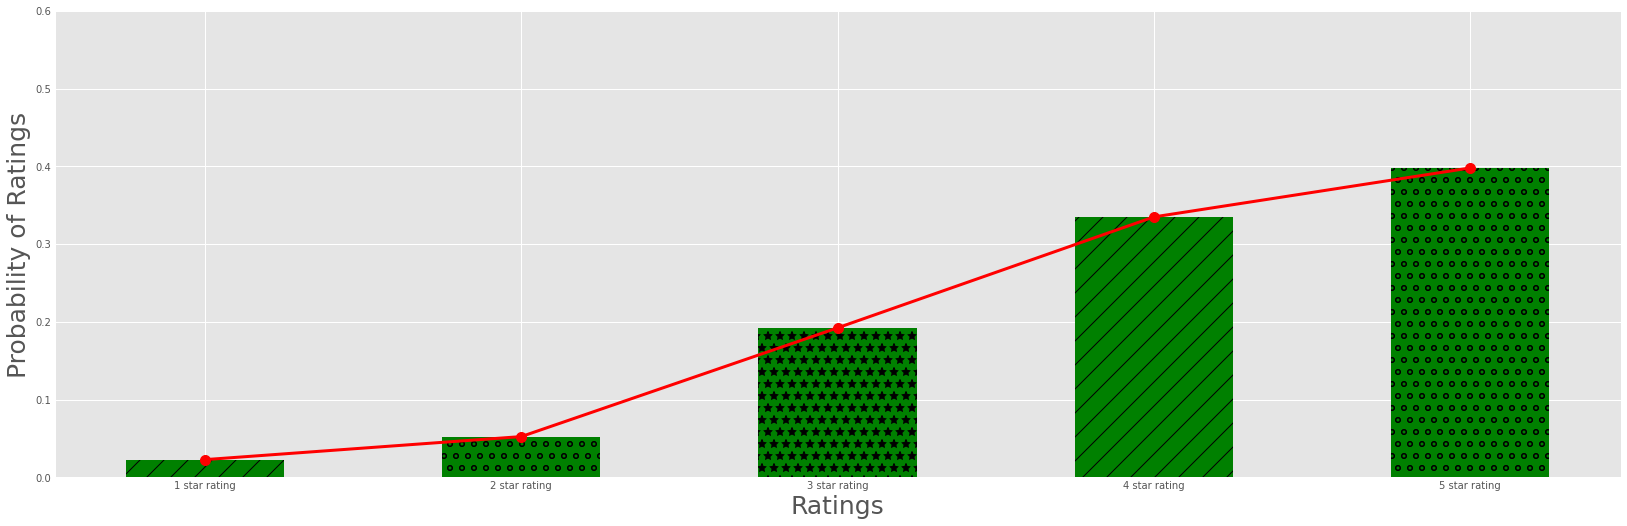

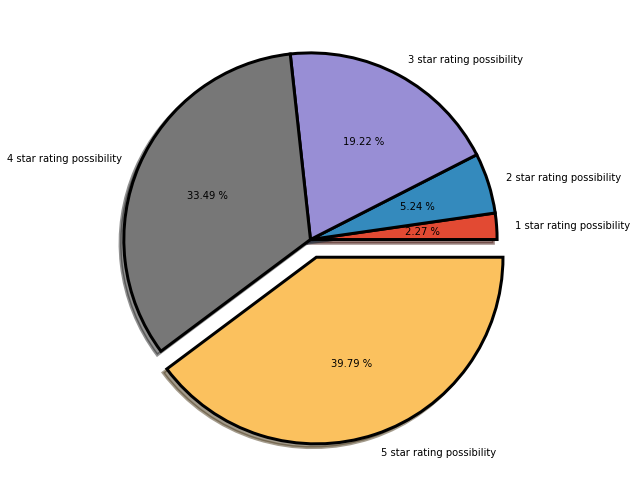

In [65]:
# probability of Rating
r_5=b['ratings_5'].sum()
r_4=b['ratings_4'].sum()
r_3=b['ratings_3'].sum()
r_2=b['ratings_2'].sum()
r_1=b['ratings_1'].sum()
r_total=b['work_ratings_count'].sum()

P_r5=r_5/r_total
P_r4=r_4/r_total
P_r3=r_3/r_total
P_r2=r_2/r_total
P_r1=r_1/r_total

plt.plot([1,2,3,4,5],[P_r1,P_r2,P_r3,P_r4,P_r5],color='red',linewidth=3,marker='o',linestyle='-',markersize=10)
bars=plt.bar(np.arange(1,6),[P_r1,P_r2,P_r3,P_r4,P_r5],color='green',width=0.5)
lst=list('/o*/o')
for i in range(5):
  bars[i].set_hatch(lst[i])
plt.xticks(ticks=range(1,6),labels=['1 star rating','2 star rating','3 star rating','4 star rating','5 star rating'],fontsize=10)
plt.yticks(ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6])
plt.xlabel('Ratings',fontsize=25)
plt.ylabel('Probability of Ratings',fontsize=25)
plt.figure()
labels=['1 star rating possibility','2 star rating possibility','3 star rating possibility','4 star rating possibility','5 star rating possibility']
plt.pie([P_r1,P_r2,P_r3,P_r4,P_r5],labels=labels,autopct='%.2f %%',wedgeprops={'edgecolor':'black','linewidth':3},shadow=True,explode=[0,0,0,0,0.1])

plt.show()




B. What is the probability rated 4 or higher is a popular book (i.e. Rated by more than one lakh users)?


      popular  average_rating
0           1            4.34
1           1            4.44
3           1            4.25
5           1            4.26
6           1            4.25
...       ...             ...
9991        0            4.12
9993        0            4.32
9995        0            4.09
9996        0            4.25
9997        0            4.35

[4102 rows x 2 columns]
The probability of a book rated 4.5 or higher being a popular book is 0.12


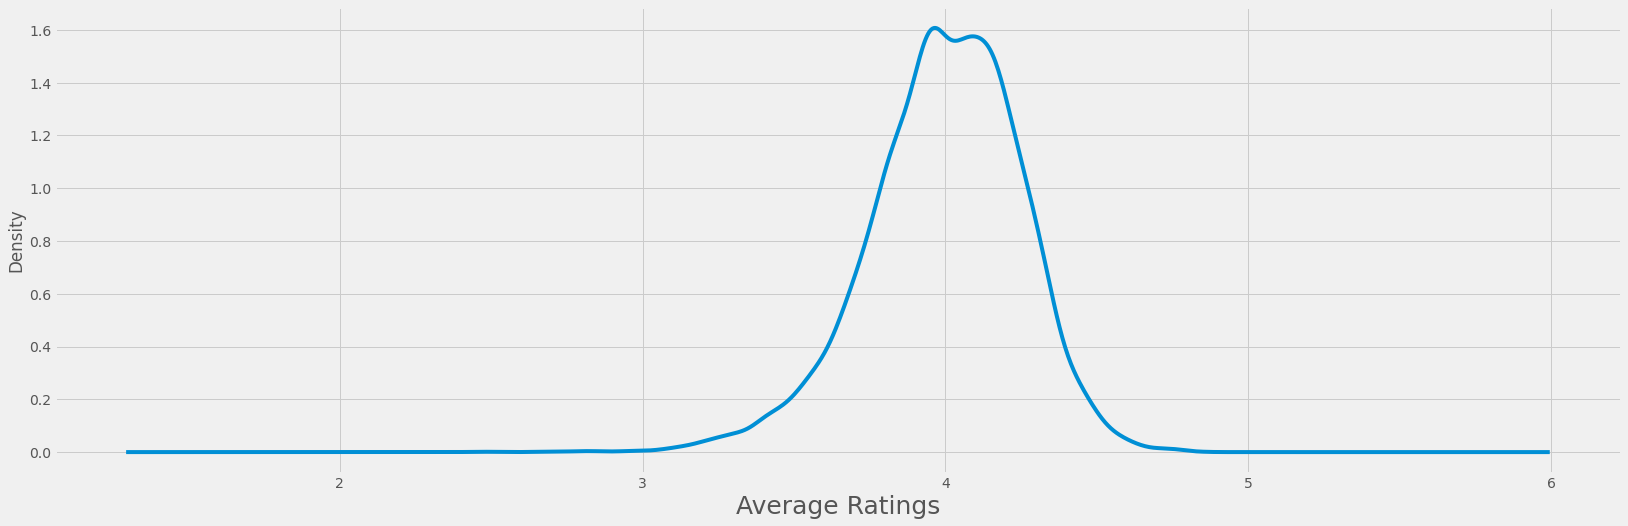

In [66]:
b['popular'] = (b.ratings_count > 100000).astype(int)

plt.style.use('fivethirtyeight')
# Plot the distribution of average ratings
b.average_rating.plot.kde()
plt.xlabel('Average Ratings',fontsize=25)

# Calculate the probability of being popular
high_rated_books = b[b.average_rating >= 4]
print(high_rated_books[['popular','average_rating']])
probability = high_rated_books.popular.mean()

print("The probability of a book rated 4.5 or higher being a popular book is {:.2f}".format(probability))

C. Which is the most preferred/coomon language to write a book to reach a  large  audience?{This question is important for the authors who wants to reach large audience}

eng      5557
en-US    1940
en-GB     215
en-CA      49
fre        22
spa        19
ger        13
ind         8
ara         6
jpn         6
por         5
pol         5
dan         3
ita         2
per         2
nor         1
vie         1
nl          1
tur         1
fil         1
swe         1
rum         1
rus         1
Name: language_code, dtype: int64

Out off 7860 books 5557 book are writen in eng language /nHence the most preferred language is eng


The probablity that a randomly chosen book is in eng is 0.71



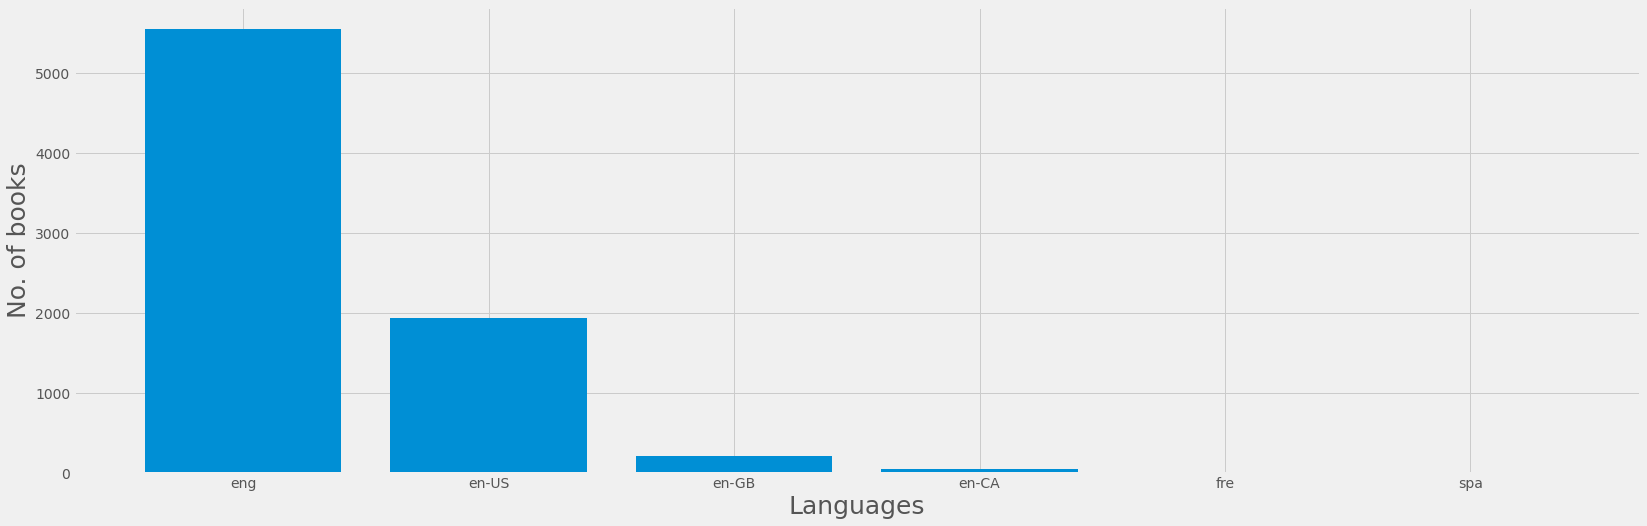

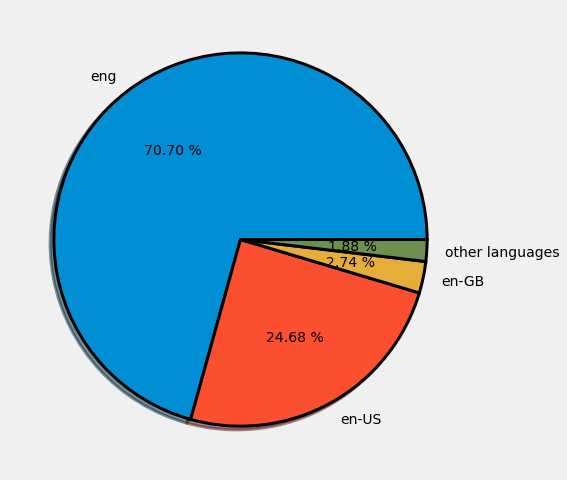

In [67]:


print(b['language_code'].value_counts())
s=b['language_code'].value_counts()
# plt.style.use('ggplot')
plt.bar(np.arange(6),s[0:6])
plt.xticks(ticks=np.arange(6),labels=s.index[:6])
others=s[3:].sum()
plt.xlabel('Languages',fontsize=25)
plt.ylabel('No. of books',fontsize=25)
# print(others)
plt.figure()
plt.pie(s[0:3].tolist()+[others],labels=s[0:3].index.tolist()+['other languages'],autopct='%.2f %%',wedgeprops={'edgecolor':'black','linewidth':3},shadow=True)
print(f'\nOut off {s.sum()} books {s[0]} book are writen in {s.index[0]} language /nHence the most preferred language is {s.index[0]}\n')


# What is probablity that a randomly chosen book is in eng?
probability=s[0]/s.sum()
print('\nThe probablity that a randomly chosen book is in eng is {:.2f}\n'.format(probability))

plt.show()


D.What are the most famous/common tags given by users to the books they read ?

to-read              9983
favorites            9881
owned                9858
books-i-own          9799
currently-reading    9776
library              9415
owned-books          9221
fiction              9097
to-buy               8692
kindle               8316
default              8239
ebook                8054
my-books             7561
audiobook            7242
ebooks               7203
Name: tag_name, dtype: int64

The probablity that a randomly chosen book is given the most famous tag i.e. to-read tag is 0.01



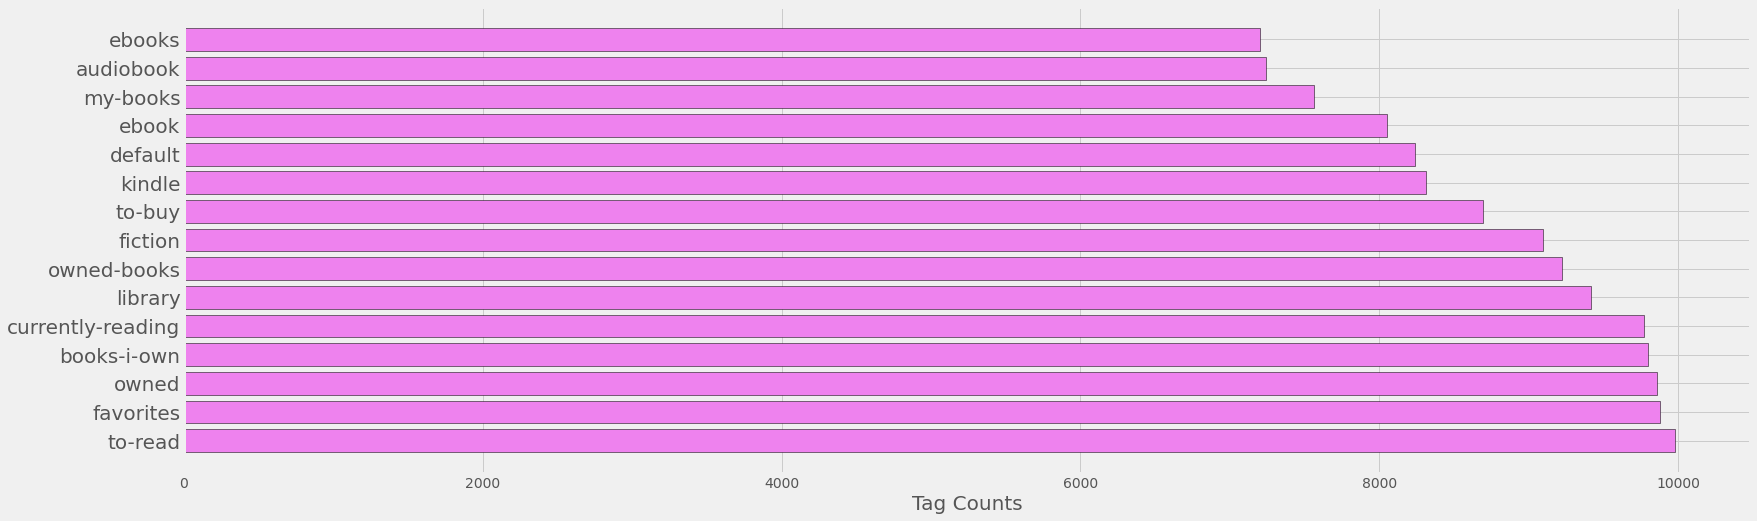

In [68]:
bt_new = bt.merge( t, on = 'tag_id' ).iloc[:,0:4]
# print(bt_new)

# 
Total_tag_counts=bt_new['tag_name'].value_counts()
# Top 15 tag_counts
tag_counts=Total_tag_counts.head(15)
print(tag_counts)
plt.barh(np.arange(len(tag_counts)),tag_counts,edgecolor='black',color='violet')
plt.yticks(ticks=np.arange(len(tag_counts)),labels=tag_counts.index,fontsize=20)
plt.xlabel('Tag Counts',fontsize=20)


# probability that a randomly chosen book is given the most famous tag
probability=Total_tag_counts[0]/Total_tag_counts.sum()

print('\nThe probablity that a randomly chosen book is given the most famous tag i.e. {} tag is {:.2f}\n'.format(Total_tag_counts.index[0],probability))

plt.show()

E. Who are the top 10 Authors who wrote maximum no. of books? What is the probability that a randomly chosen book is written by one of those top 10 authors?

The total no. of unique authors are  3757 

Nora Roberts           58
Stephen King           53
Terry Pratchett        40
Agatha Christie        38
Dean Koontz            34
James Patterson        33
J.D. Robb              33
Meg Cabot              32
David Baldacci         31
Laurell K. Hamilton    29
Name: authors, dtype: int64

The probablity that a randomly chosen book is written by one of those top 10 authors is 0.05



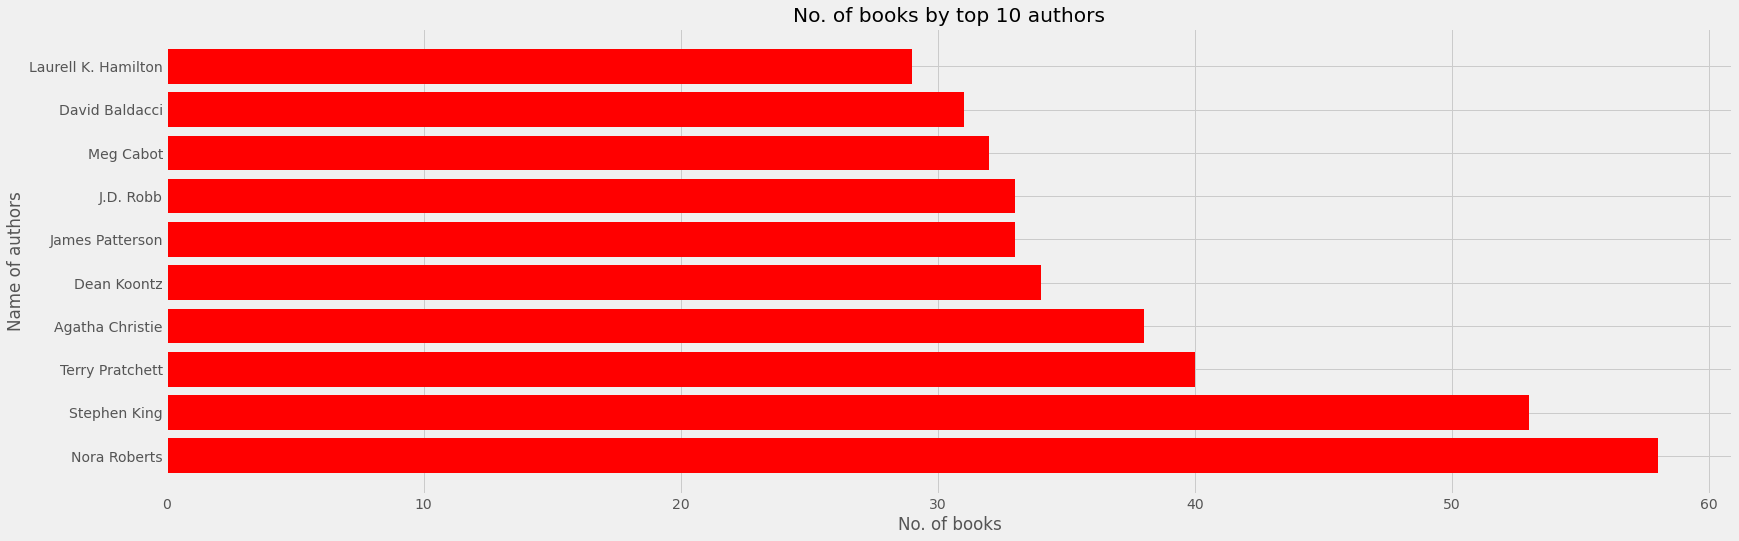

In [69]:
print('The total no. of unique authors are ',b['authors'].nunique(),'\n')

# Top 10 authors who wrote maximum no. of books
authors=b['authors'].value_counts()
top_authors=authors[:10]
print(top_authors)


plt.barh(np.arange(len(top_authors)),top_authors,color='red')
plt.yticks(ticks=np.arange(len(top_authors)),labels=top_authors.index)
plt.xlabel('No. of books')
plt.ylabel('Name of authors')
plt.title('No. of books by top 10 authors')

#Finding Probability
Prob=top_authors.sum()/authors.sum()
print('\nThe probablity that a randomly chosen book is written by one of those top 10 authors is {:.2f}\n'.format(Prob))

plt.show()

F. What are the top 10 books suggested by most of users to read?

The Book Thief                                                              2772
Catch-22                                                                    1840
Nineteen Eighty-Four                                                        1812
The Kite Runner                                                             1767
Miss Peregrine’s Home for Peculiar Children                                 1650
A Game of Thrones                                                           1619
Slaughterhouse-Five, or The Children's Crusade: A Duty-Dance with Death     1608
O Alquimista                                                                1576
The Casual Vacancy                                                          1521
The Night Circus                                                            1502
Name: original_title, dtype: int64


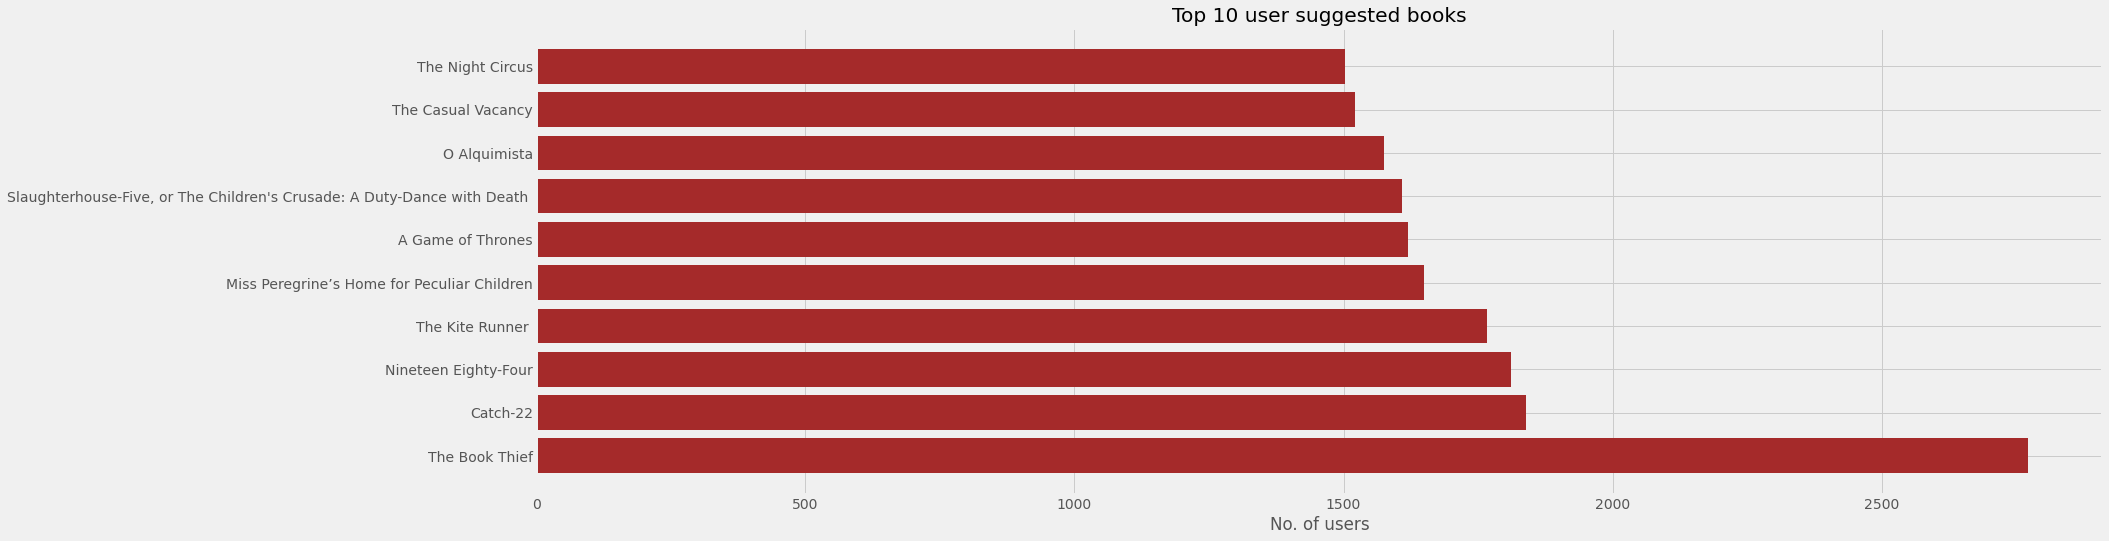

In [70]:
tr_new=tr.merge(b[['book_id','original_title']], on = 'book_id')
toRead=tr_new['original_title'].value_counts()[:10]
print(toRead)

plt.barh(np.arange(len(toRead)),toRead.tolist(),color='brown')
plt.yticks(ticks=np.arange(len(toRead)),labels=toRead.index)

plt.xlabel('No. of users')
plt.title('Top 10 user suggested books')

plt.show()


G. Who are the top 10 users who have rated the maximum no. of books ? Which user ID  has given  the highest average rating among them ?

The top 10 users IDs giving maximum no. of ratings are [12874, 30944, 52036, 12381, 28158, 45554, 6630, 37834, 15604, 7563] 


The ID of user who has given highest average rating is 30944



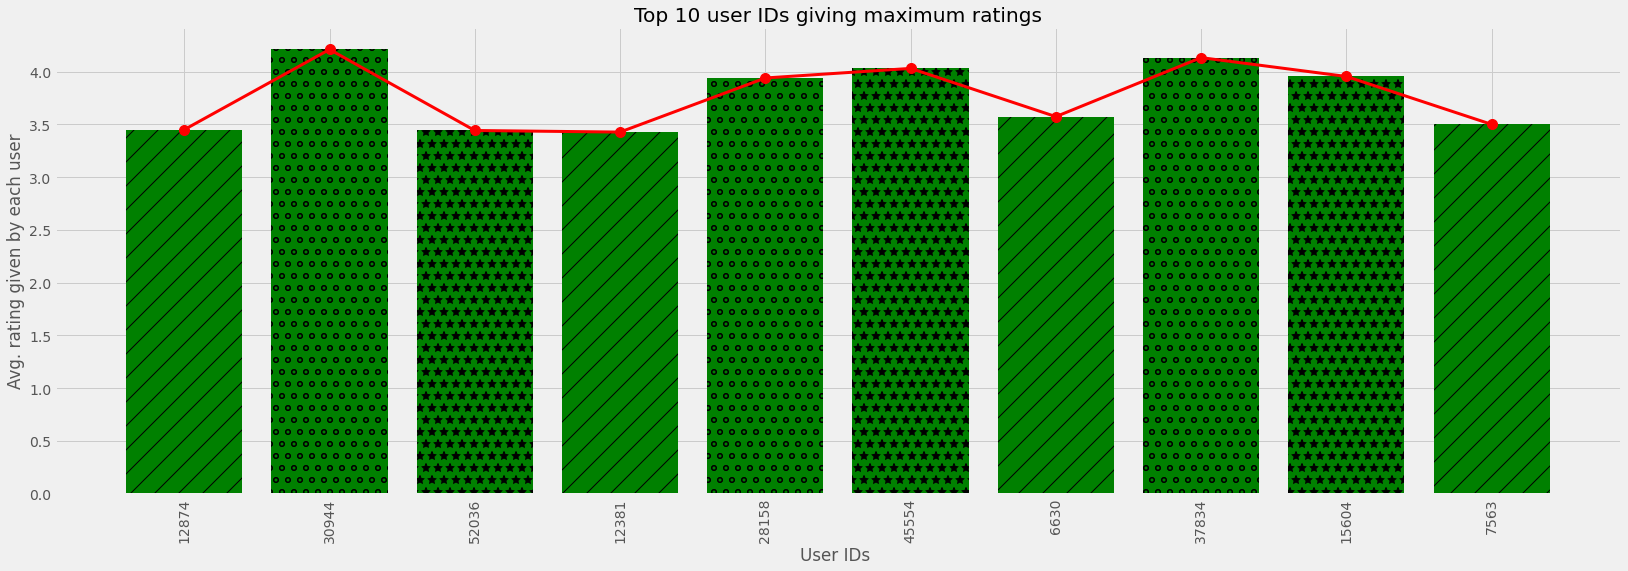

In [71]:

# Finding top 10 user Ids giving maximum no. of ratings.
count=r['user_id'].value_counts().head(10)
top_id=count.index.tolist()
print('The top 10 users IDs giving maximum no. of ratings are',top_id,'\n')

# Average rating of above top 10 users
avg_rating=[]
for i in top_id:
  s=(r['user_id']==i)
  avg_rating.append(r[s]['rating'].mean())

# Ploting
plt.figure()
plt.plot(range(1,11),avg_rating,color='red',linewidth=3,marker='o',linestyle='-',markersize=10)
bars=plt.bar(np.arange(1,len(top_id)+1),avg_rating,color='green')
lst=list('/o*/o*/o*/')
for i in range(len(top_id)):
  bars[i].set_hatch(lst[i])
plt.xticks(ticks=range(1,len(top_id)+1),labels=top_id,rotation='vertical')
plt.xlabel('User IDs ')
plt.ylabel('Avg. rating given by each user')
plt.title('Top 10 user IDs giving maximum ratings')

# Finding user ID  has given the highest average rating among them
max_avg=max(avg_rating)
i=avg_rating.index(max_avg)
user_id_max_avg=top_id[i]
print('\nThe ID of user who has given highest average rating is {}\n'.format(user_id_max_avg))

plt.show()



In [72]:
# does to read books have avg rating greater than 4
print(tr['book_id'].nunique())
to_read=tr.drop_duplicates(subset='book_id')
print(to_read)
to_read=to_read.merge(b[['book_id','average_rating']], on = 'book_id')
print(to_read)




9986
        user_id  book_id
0             9        8
1            15      398
2            15      275
3            37     7173
4            34      380
...         ...      ...
870567    39621     9248
871090    11093     9580
874596    28160     8685
875564     2700     7094
891911    49553     5884

[9986 rows x 2 columns]
      user_id  book_id  average_rating
0           9        8            3.79
1          15      398            3.73
2          15      275            3.63
3          37     7173            4.43
4          34      380            4.02
...       ...      ...             ...
7851    29569     7467            3.70
7852    32986     6868            4.03
7853    45310     9470            4.56
7854    47225     6245            3.66
7855    28160     8685            3.77

[7856 rows x 3 columns]


In [73]:
# Filter for books with a rating of 4.5 or higher
high_rated_books = b[b['average_rating'] >= 4.5]

# Filter for books with more than 100,000 ratings
popular_books = high_rated_books[high_rated_books['ratings_count'] > 100000]

# Calculate the probability of a book being popular given that it has a rating of 4.5 or higher
probability = len(popular_books) / len(high_rated_books)

print(f'The probability of a book rated 4.5 or higher being popular is {probability:.2%}.')

The probability of a book rated 4.5 or higher being popular is 17.89%.
